#### Introducing the challenge
- Learn from the expert who won DrivenData's challenge
 - Natural Language processing
 - Feature Engineering 
 - Efficiency boosting hashing tricks
- Use data to have a social impact

- Budgets for schools are huge, complex, and not standardized
 - Hundreds of hours each year are spent manually labeling
- Goal: Build a machine learning algorithm that can automate the process
- Budget data
 - Line-item: "Algebra books for 8th grade students."
 - Labels: 'Textbooks', 'Math', 'Middle School'
- This is a supervised learning problem

### Over 100 target variables
- This is a classification problem
- Predictions will be **probabilities** for each label

### Exploring the data
#### Load and preview the data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('TrainingData.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [2]:
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [4]:
style.use('seaborn-white')

In [16]:
test = df.FTE.dropna()
test = test[test < 1.05]

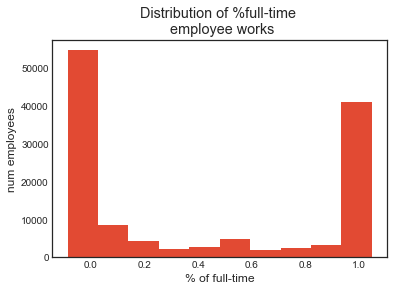

In [17]:
# Create the histogram
plt.hist(test)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

### Looking at the datatypes
#### Encode labels as categories
- ML algorithms work on numbers, not strings
 - Need a numeric representation of these strings
- Strings can be slow compared to numbers
- In pandas, 'category' dtype encodes categorical data numerically
 - Can speed up code

### Dummy variable encoding
- Also called a 'binary indicator' representation.

### Lambda functions
- Alternative to 'def' syntax
- Easy way to make simple, one-line functions

In [18]:
square = lambda x: x*x
square(2)

4

In [19]:
square(3)

9

### Encode lables as categories
- In the sample dataframe, we only have one relevant column
- In the budget data, there are multiple columns that need to be made categorical

In [20]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

In [24]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [26]:
# Define the lambda function: categorize_label
categorize_label = lambda x : x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


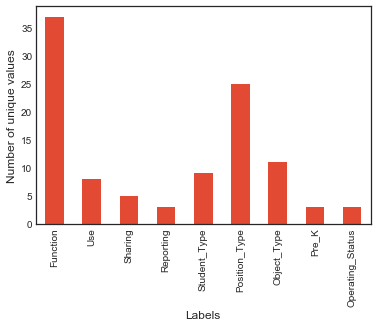

In [27]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

### How do we measure success?
- Accuracy can be misleading when classes are imbalanced
 - Legitimate email: 99%, Spam: 1%
 - Model that never predicts spam will be 99% accurate
- Metric used in this problem: log loss
 - It is a loss function 
 - Measure of error
 - Want to minimize the error (unlike accuracy)

### Log loss binary classification 
- Log loss for binary classification 
 - Actual value: y={1=yes, 0=no}<br>
<br>
 $ logloss = -\displaystyle\frac{1}{N} \displaystyle\sum_{i~=~1}^{N} (y_i~log(p_i)~+~(1~+~y_i)log(1-p_i)) $
<br>
<br>
- We are taking the logloss for each row in the data set.

### Log loss binary classification: example
<br>
$ logloss_{(N=1)}~=~y~log(p)+(1-y)log(1-p) $
<br>

True label = 0<br> 
Model confidently precdicts 1 (with p = 0.90)<br>
In this case because y is zero, the first term becomes zero<br>
<br>
$ logloss = (1-y)log(1-p) $<br>
$ logloss = log(1-0.9)$<br>
$ logloss = log(0.1)$<br>
$ logloss = 2.30 $

True label = 1<br>
Model predicts 0 (with p = 0.50)<br>
logloss = 0.69<br>
Better to be less confident than confident and wrong.

In [30]:
#logloss.py

def compute_log_loss(predicted, actual, eps=1e-14):
    """Computes the logarithmic loss between the predicted and 
    actual when these are 1D arrays
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels: Either 0 or 1.
    :param eps (optional): log(0) is inf: se we need to offset our 
                            predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                       + (1 - actual)
                       * np.log(1 - predicted))
    return loss 

In [31]:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

In [32]:
compute_log_loss(predicted=0.5, actual=1)

0.6931471805599453

In [33]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])

In [34]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

Log loss, correct and confident: 0.05129329438755058
